<a href="https://colab.research.google.com/github/SahilSuvarna1023/Aviator-Betting-Dataset-Analysis/blob/main/AI_Powered_Betting_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Load Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from xgboost import XGBRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import files

In [6]:
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))

Saving aviator_dataset.csv to aviator_dataset (1).csv


In [7]:
# 📌 Step 3: Data Cleaning
# Remove duplicates
df.drop_duplicates(inplace=True)


In [8]:
# Handle missing values
df.dropna(subset=['payout'], inplace=True)  # Drop rows where payout is missing

In [9]:
# Convert datetime columns
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df.dropna(subset=['created_at'], inplace=True)  # Drop rows with invalid dates
df['date'] = df['created_at'].dt.date  # Extract date for time series

In [10]:
# Ensure payout is numeric
df['payout'] = pd.to_numeric(df['payout'], errors='coerce')
df.dropna(subset=['payout'], inplace=True)

In [11]:
# 📌 Step 4: Exploratory Data Analysis (EDA)
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nPayout Statistics:\n", df['payout'].describe())

<class 'pandas.core.frame.DataFrame'>
Index: 419861 entries, 0 to 419861
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype              
---  ------      --------------   -----              
 0   id          419861 non-null  object             
 1   created_at  419861 non-null  datetime64[ns, UTC]
 2   updated_at  419861 non-null  object             
 3   app         419861 non-null  object             
 4   payout      419861 non-null  float64            
 5   date        419861 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), object(4)
memory usage: 22.4+ MB
None

Missing Values:
 id            0
created_at    0
updated_at    0
app           0
payout        0
date          0
dtype: int64

Payout Statistics:
 count    419861.000000
mean         13.301529
std         827.313437
min           1.000000
25%           1.290000
50%           1.940000
75%           3.890000
max      432955.520000
Name: payout, dtype: float64


In [13]:
# Define features and target
features = ['payout_lag1', 'payout_lag2', 'payout_lag3']
target = 'payout'

X = df[features]
y = df[target]

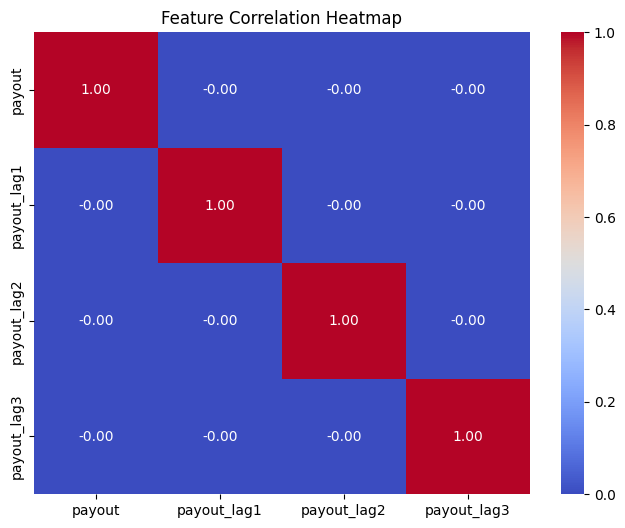

In [31]:
# Visualization 3: Feature Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['payout', 'payout_lag1', 'payout_lag2', 'payout_lag3']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


In [14]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
#Step 6: Train Machine Learning Models

# 🌟 Model 1: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# 🌟 Model 2: XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

In [17]:
# 📌 Step 7: Evaluate Model Performance
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n📊 {model_name} Model Performance:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")

evaluate_model(y_test, rf_preds, "Random Forest")
evaluate_model(y_test, xgb_preds, "XGBoost")


📊 Random Forest Model Performance:
MAE: 22.1342
RMSE: 786.3262
R² Score: -0.0318

📊 XGBoost Model Performance:
MAE: 28.5513
RMSE: 1932.6541
R² Score: -5.2331


In [18]:
# 📌 Step 8: Predict Next High Payout Event
latest_data = np.array([df.iloc[-1][features].values])  # Use last known data for prediction

rf_next_payout = rf_model.predict(latest_data)[0]
xgb_next_payout = xgb_model.predict(latest_data)[0]

print(f"\n🔮 Predicted Next High Payout (Random Forest): {rf_next_payout:.2f}")
print(f"🔮 Predicted Next High Payout (XGBoost): {xgb_next_payout:.2f}")



🔮 Predicted Next High Payout (Random Forest): 143.44
🔮 Predicted Next High Payout (XGBoost): 150.91


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


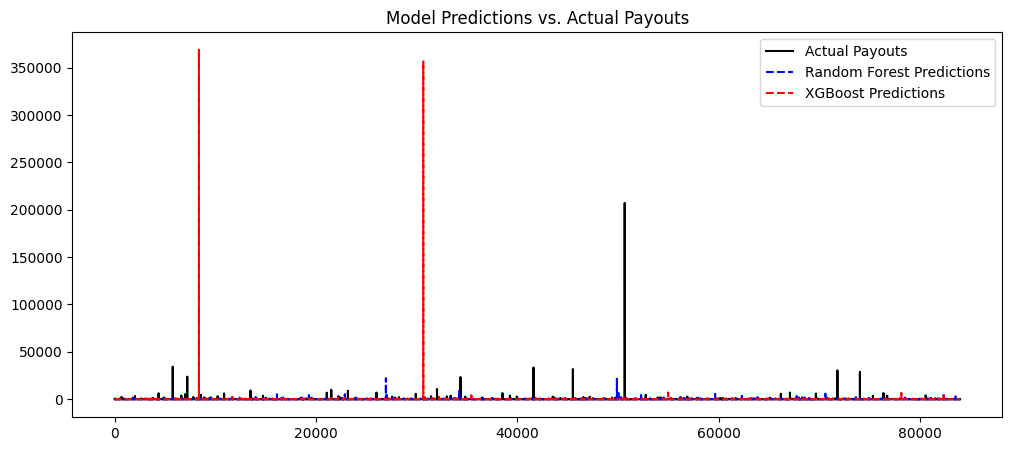

In [19]:
# 📌 Step 9: Visualize Predictions vs. Actual Values
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label="Actual Payouts", color='black')
plt.plot(rf_preds, label="Random Forest Predictions", linestyle="dashed", color='blue')
plt.plot(xgb_preds, label="XGBoost Predictions", linestyle="dashed", color='red')
plt.legend()
plt.title("Model Predictions vs. Actual Payouts")
plt.show()

In [20]:
# 📌 Step 10: Fraud Detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df['fraud_score'] = iso_forest.fit_predict(df[['payout']])


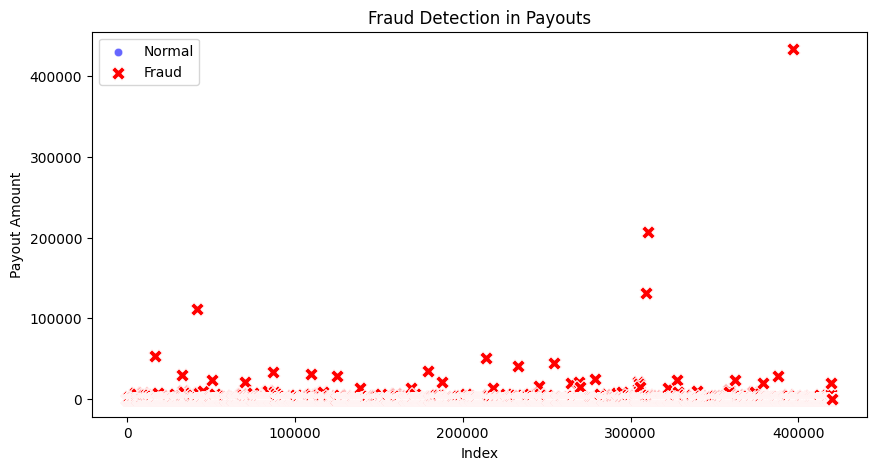

In [32]:
# Fraud Detection Visualization
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df['fraud_score'] = iso_forest.fit_predict(df[['payout']])
fraud_cases = df[df['fraud_score'] == -1]

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.index, y=df['payout'], color='blue', alpha=0.6, label='Normal')
sns.scatterplot(x=fraud_cases.index, y=fraud_cases['payout'], color='red', label='Fraud', marker='X', s=100)
plt.title("Fraud Detection in Payouts")
plt.xlabel("Index")
plt.ylabel("Payout Amount")
plt.legend()
plt.show()


In [21]:
# 📌 Step 11: Clustering Analysis (K-Means for Betting Behavior)

# Standardize payout values
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['payout']])

# Train K-Means model (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)


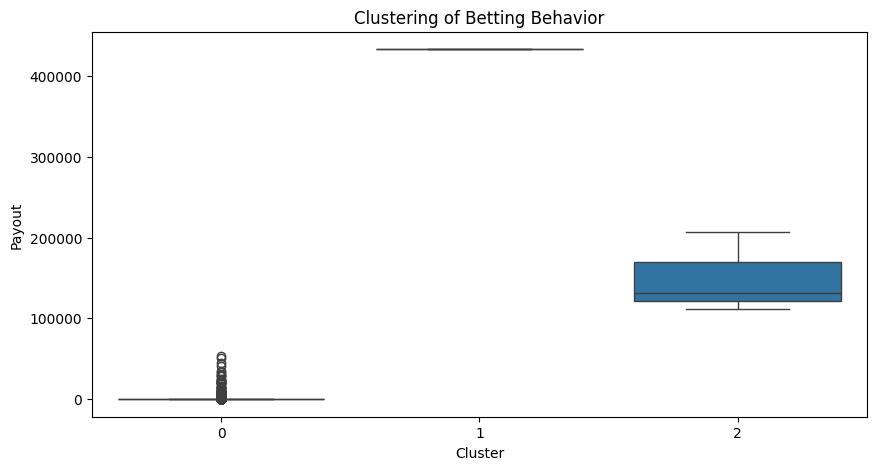

In [22]:
# 📌 Step 12: Visualize Clustering
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['cluster'], y=df['payout'])
plt.title("Clustering of Betting Behavior")
plt.xlabel("Cluster")
plt.ylabel("Payout")
plt.show()


In [23]:
# 📌 Step 13: Display Cluster Insights
print("\n🎯 Betting Behavior Clusters:")
for cluster in sorted(df['cluster'].unique()):
    print(f"\nCluster {cluster}:")
    print(df[df['cluster'] == cluster]['payout'].describe())


🎯 Betting Behavior Clusters:

Cluster 0:
count    419854.000000
mean         11.199649
std         255.606527
min           1.000000
25%           1.290000
50%           1.940000
75%           3.890000
max       53142.900000
Name: payout, dtype: float64

Cluster 1:
count         1.00
mean     432955.52
std            NaN
min      432955.52
25%      432955.52
50%      432955.52
75%      432955.52
max      432955.52
Name: payout, dtype: float64

Cluster 2:
count         3.000000
mean     149871.563333
std       50635.228684
min      111046.070000
25%      121235.305000
50%      131424.540000
75%      169284.310000
max      207144.080000
Name: payout, dtype: float64


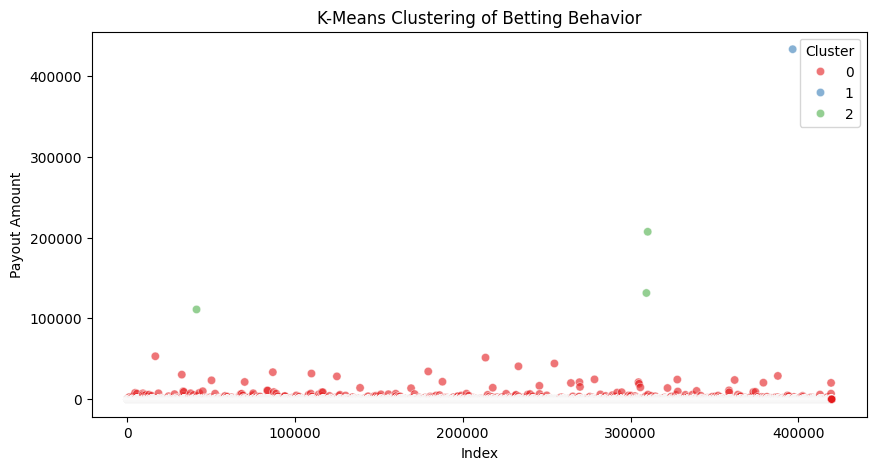

In [30]:
# Clustering Visualization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['payout']])
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.index, y=df['payout'], hue=df['cluster'], palette='Set1', alpha=0.6)
plt.title("K-Means Clustering of Betting Behavior")
plt.xlabel("Index")
plt.ylabel("Payout Amount")
plt.legend(title='Cluster')
plt.show()